In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
np.random.seed(1)
train_indexes = np.random.randint(60000, size=1000)
X_train = X_train[train_indexes, :]
y_train = y_train[train_indexes]

test_indexes = np.random.randint(10000, size=300)
X_test = X_test[test_indexes, :]
y_test = y_test[test_indexes]


In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [6]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Flatten,
    Input,
    MaxPooling2D,
    Reshape,
    UpSampling2D,
)
from tensorflow.keras.models import Model

In [ ]:
# Encoder
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Bottleneck
encoded = Flatten()(encoded)
encoded = Dense(2, name="bottleneck_2d")(encoded)

In [ ]:
# Decoder
x = Dense(256, activation="relu")(encoded)
x = Dense(4 * 4 * 128, activation="relu")(x)
x = Reshape((4, 4, 128))(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [ ]:
# Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck_2d (Dense)                │ (None, 2)                   │           4,098 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_18 (UpSampling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 344,835 (1.32 MB)

 Trainable params: 343,939 (1.31 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
autoencoder.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(X_test, X_test),
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 922ms/step - loss: 0.2189 - val_loss: 0.1971
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 653ms/step - loss: 0.1289 - val_loss: 0.1520
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 699ms/step - loss: 0.1118 - val_loss: 0.1215
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 692ms/step - loss: 0.1022 - val_loss: 0.1064
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 805ms/step - loss: 0.0969 - val_loss: 0.1007
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 672ms/step - loss: 0.0907 - val_loss: 0.0993
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 650ms/step - loss: 0.0870 - val_loss: 0.0986
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 702ms/step - loss: 0.0821 - val_loss: 0.0996
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 872ms/step - loss: 0.0790 - val_loss: 0.1010
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step - loss: 0.0759 - val_loss: 0.1022
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 864ms/step - loss: 0.0747 - val_loss: 0.1043
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 796ms/step - loss: 0.0717 - 

In [ ]:
encoder = Model(
    inputs=autoencoder.input, outputs=autoencoder.get_layer("bottleneck_2d").output
)

In [ ]:
latent_representations = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
from sklearn.decomposition import PCA

# Flatten original images
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# PCA with same latent dimension (128 for fair comparison)
pca = PCA(n_components=2)
pca_reps = pca.fit_transform(X_train_flat)

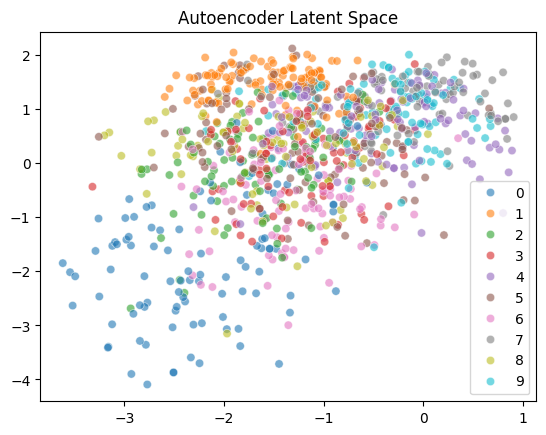

In [ ]:
import seaborn as sns

sns.scatterplot(
    x=latent_representations[:, 0],
    y=latent_representations[:, 1],
    hue=y_train,
    palette="tab10",
    alpha=0.6,
)
plt.title("Autoencoder Latent Space")
plt.show()

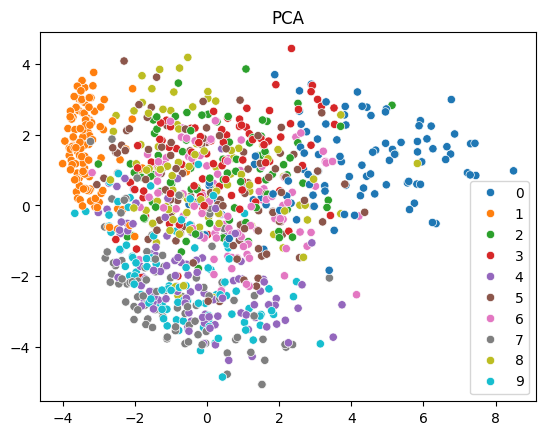

In [ ]:
sns.scatterplot(x=pca_reps[:, 0], y=pca_reps[:, 1], hue=y_train, palette="tab10")
plt.title("PCA")
plt.show()

In [ ]:
reconstructed_ae = autoencoder.predict(X_test)

mse_ae = np.mean((X_test - reconstructed_ae) ** 2)
print(f"Autoencoder MSE: {mse_ae:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step
Autoencoder MSE: 0.1085


In [ ]:
pca = PCA(n_components=128)
pca.fit(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
reconstructed_pca = pca.inverse_transform(X_test_pca)

reconstructed_pca = reconstructed_pca.reshape(-1, 28, 28, 1)

mse_pca = np.mean((X_test - reconstructed_pca) ** 2)
print(f"PCA MSE: {mse_pca:.4f}")

PCA MSE: 0.0051


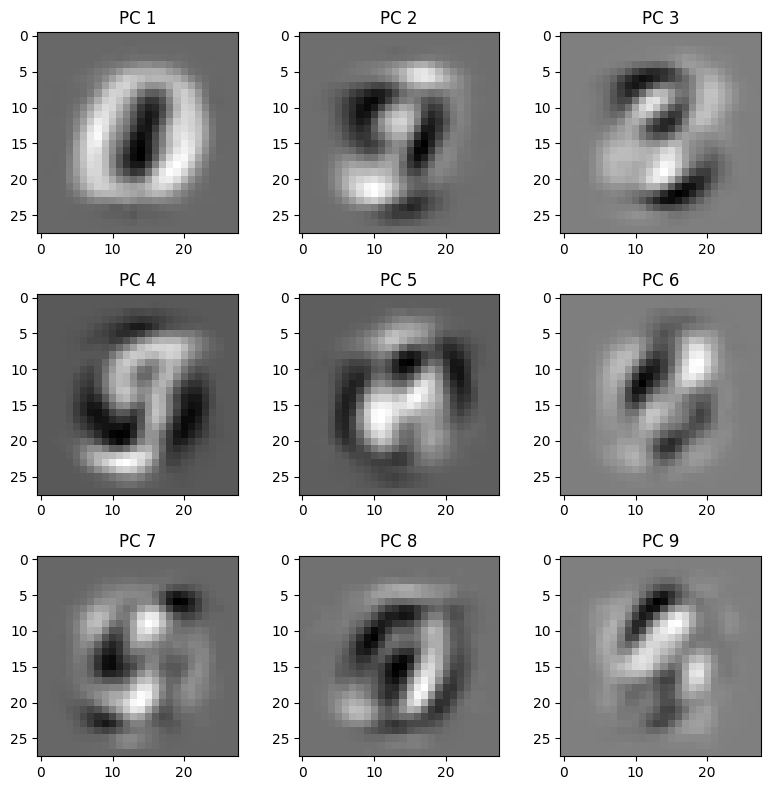

In [ ]:
components = pca.components_

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"PC {i + 1}")
plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


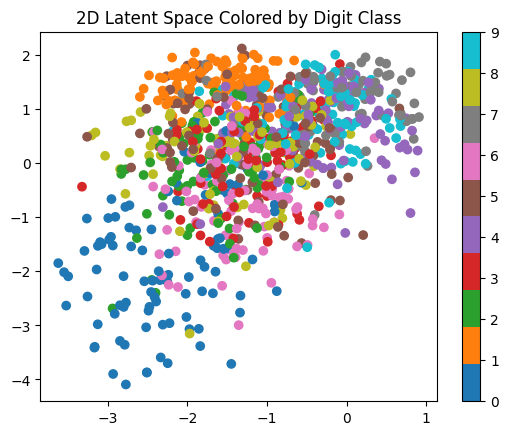

In [ ]:
latent_representations = encoder.predict(X_train)
plt.scatter(
    latent_representations[:, 0], latent_representations[:, 1], c=y_train, cmap="tab10"
)
plt.colorbar()
plt.title("2D Latent Space Colored by Digit Class")
plt.show()
